In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Define the top 10 IT companies based on market cap
companies = {
    'MSFT': 'Microsoft',
    'NVDA': 'NVIDIA',
    'AAPL': 'Apple',
    'GOOGL': 'Alphabet',
    'AMZN': 'Amazon',
    'META': 'Meta Platforms',
    'AVGO': 'Broadcom',
    'ADBE': 'Adobe',
    'CRM': 'Salesforce',
    'INTC': 'Intel'
}

In [ ]:
# Set the date range for the past 5 years
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

In [ ]:
# Fetch stock data
data = yf.download(list(companies.keys()), start=start_date, end=end_date)['Close']

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Calculate percentage change
pct_change = data.pct_change()
cumulative_return = (1 + pct_change).cumprod() - 1

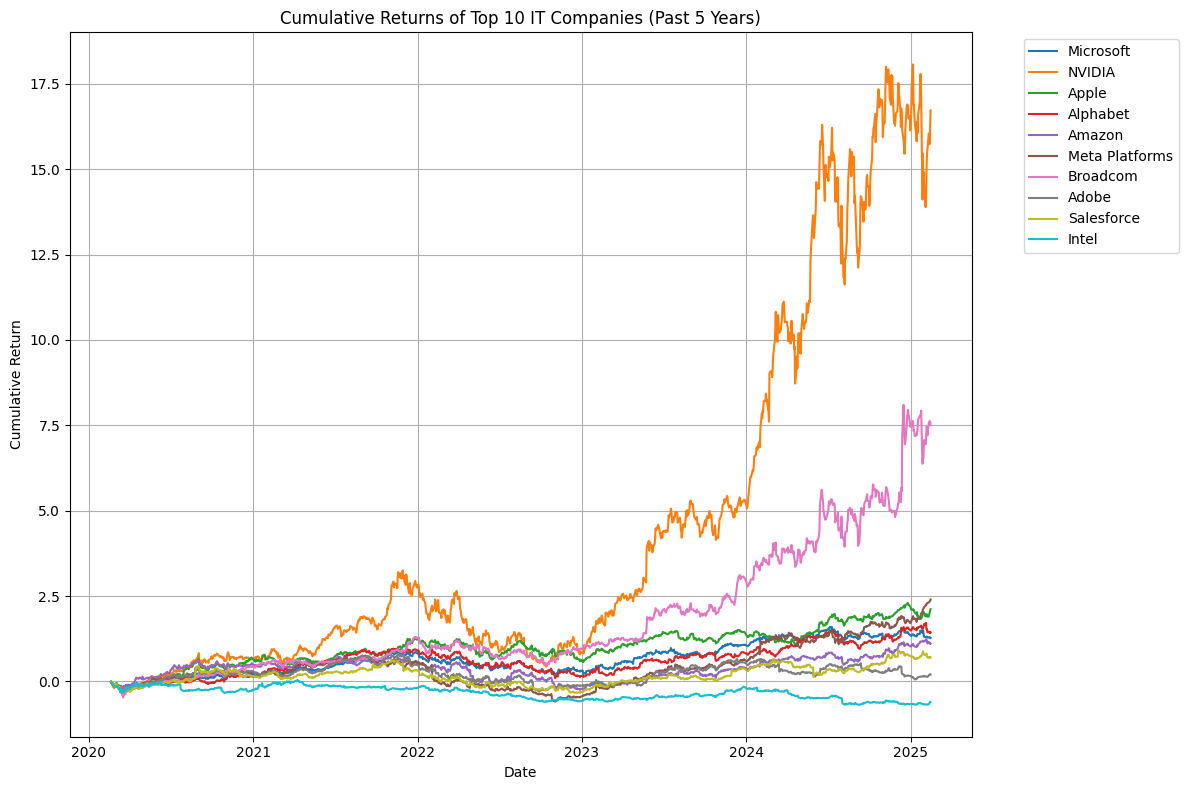

In [ ]:
# Plot the cumulative returns
plt.figure(figsize=(12, 8))
for ticker, name in companies.items():
    plt.plot(cumulative_return.index, cumulative_return[ticker], label=name)

plt.title('Cumulative Returns of Top 10 IT Companies (Past 5 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# Calculate and display final returns
final_returns = cumulative_return.iloc[-1].sort_values(ascending=False)
print("Final Returns (Past 5 Years):")
for ticker, return_value in final_returns.items():
    print(f"{companies[ticker]}: {return_value:.2%}")

Final Returns (Past 5 Years):
NVIDIA: 1672.25%
Broadcom: 750.37%
Meta Platforms: 240.01%
Apple: 211.45%
Alphabet: 143.83%
Microsoft: 127.39%
Amazon: 110.74%
Salesforce: 70.25%
Adobe: 20.06%
Intel: -60.33%
